# Section 1: Data Acquisition, Cleaning & Pre-Processing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data and Preview
all_data = "/Meta Data for Project Final.xlsx"

df_country_stats = pd.read_excel(all_data, sheet_name='Country statistics year wise ')
df_country_region = pd.read_excel(all_data, sheet_name='Country and Region')
df_global_temp = pd.read_excel(all_data, sheet_name='Yearly Global Temprature Data')
df_policy = pd.read_excel(all_data, sheet_name='Global Polcicies ')

df_country_stats.head()

,Country,Year,Population,GDP,Total Co2 (tonnes),Total Co2,Co2 per capita (tonnes),Total Coal Co2 (tonnes),Total Coal Co2,Coal Co2 per capita,Total Ghg (tonnes),Total Ghg,Ghg per capita,Total Methane (tonnes),Total Methane,Methane per capita,Total Nitrous oxide (tonnes),Total Nitrous oxide,Nitrous oxide per capita
0,Afghanistan,1750,2802560.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,Afghanistan,1751,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,Afghanistan,1752,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,Afghanistan,1753,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,Afghanistan,1754,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [3]:
# Preview Data Structure
print(df_country_stats.shape)
print(df_country_region.shape)
print(df_global_temp.shape)
print(df_policy.shape)

(50191, 19)
(199, 2)
(175, 4)
(168, 4)


In [4]:
# Standardize Column Names

def clean_column_names(df):
    df.columns = (df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('-', '_')
        .str.replace(r'[^\w\s]', '', regex=True)
    )
    return df

df_country_stats = clean_column_names(df_country_stats)
df_country_region = clean_column_names(df_country_region)
df_global_temp = clean_column_names(df_global_temp)
df_policy = clean_column_names(df_policy)

print(df_country_stats.columns.tolist())
print(df_country_region.columns.tolist())
print(df_global_temp.columns.tolist())
print(df_policy.columns.tolist())

['country', 'year', 'population', 'gdp', 'total_co2_tonnes', 'total_co2', 'co2_per_capita_tonnes', 'total_coal_co2_tonnes', 'total_coal_co2', 'coal_co2_per_capita', 'total_ghg_tonnes', 'total_ghg', 'ghg_per_capita', 'total_methane_tonnes', 'total_methane', 'methane_per_capita', 'total_nitrous_oxide_tonnes', 'total_nitrous_oxide', 'nitrous_oxide_per_capita']
['country', 'region']
['year', 'global_temp_anomaly_c_vs_avg', 'northern_hemisphere_temp_anomaly_c_vs_avg', 'southern_hemisphere_temp_anomaly_c_vs_avg']
['year', 'event_name', 'region', 'description']


In [5]:
# Null Count Summary

def null_summary(df, name):
    print(f"\nNULL SUMMARY: {name}")

    nulls = df.isnull().sum()

    nulls_with_data = nulls[nulls > 0]

    if not nulls_with_data.empty:
        print(nulls_with_data)
    else:
        print("✅ No missing values in this DataFrame.")

    print("Original Shape:", df.shape)

null_summary(df_country_stats, "Country Statistics")
null_summary(df_country_region, "Country and Region")
null_summary(df_global_temp, "Global Temperature")
null_summary(df_policy, "Policy Data")



NULL SUMMARY: Country Statistics
population                   9172
gdp                         34940
total_co2_tonnes             5391
total_co2                   21054
co2_per_capita_tonnes       24009
total_coal_co2              28437
coal_co2_per_capita         29142
total_ghg                   12781
ghg_per_capita              14378
total_methane               12781
methane_per_capita          14378
total_nitrous_oxide         11911
nitrous_oxide_per_capita    13871
dtype: int64
Original Shape: (50191, 19)

NULL SUMMARY: Country and Region
✅ No missing values in this DataFrame.
Original Shape: (199, 2)

NULL SUMMARY: Global Temperature
✅ No missing values in this DataFrame.
Original Shape: (175, 4)

NULL SUMMARY: Policy Data
✅ No missing values in this DataFrame.
Original Shape: (168, 4)


In [6]:
# Checking Data Types

print(df_country_stats.dtypes)
print("---------------------------------------")
print(df_country_region.dtypes)
print("---------------------------------------")
print(df_global_temp.dtypes)
print("---------------------------------------")
print(df_policy.dtypes)

country                        object
year                            int64
population                    float64
gdp                           float64
total_co2_tonnes              float64
total_co2                     float64
co2_per_capita_tonnes         float64
total_coal_co2_tonnes         float64
total_coal_co2                float64
coal_co2_per_capita           float64
total_ghg_tonnes              float64
total_ghg                     float64
ghg_per_capita                float64
total_methane_tonnes          float64
total_methane                 float64
methane_per_capita            float64
total_nitrous_oxide_tonnes    float64
total_nitrous_oxide           float64
nitrous_oxide_per_capita      float64
dtype: object
---------------------------------------
country    object
region     object
dtype: object
---------------------------------------
year                                           int64
global_temp_anomaly_c_vs_avg                 float64
northern_hemisphere_temp_ano

In [7]:
# Filtering & Matching Countries

''' The Country statistics year wise table contains
additional rows of countries that are not needed, so
we will filter the countries according to the countries
and regions table '''

valid_countries = df_country_region['country'].unique()
df_country_stats_updated = df_country_stats[df_country_stats['country'].isin(valid_countries)].copy()

print("New Table Shape:", df_country_stats_updated.shape)
print("Unique Countries in the New Table:", df_country_stats_updated['country'].nunique())


New Table Shape: (38866, 19)
Unique Countries in the New Table: 199


In [8]:
# Cleaning rows which have only null or "0" values

columns_to_check = df_country_stats_updated.columns.difference(['country', 'year'])


df_country_stats_cleaned = df_country_stats_updated[
    ~(df_country_stats_updated[columns_to_check].isnull() | (df_country_stats_updated[columns_to_check] == 0)).all(axis=1)
]

print("Before cleaning:", df_country_stats_updated.shape)
print("After cleaning: ", df_country_stats_cleaned.shape)


Before cleaning: (38866, 19)
After cleaning:  (36910, 19)


# Section 2: Exploratory Data Analysis (EDA)

In [9]:
# Summary Statistics & Distributions

df_country_stats_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
year,36910.0,1.928895e+03,5.687397e+01,1.750000e+03,1.884000e+03,1.931000e+03,1.977000e+03,2.023000e+03
population,36750.0,1.513632e+07,7.197495e+07,5.010000e+02,3.556185e+05,2.137922e+06,7.648038e+06,1.438070e+09
gdp,15230.0,2.493125e+11,1.087111e+12,4.998000e+07,7.866681e+09,2.739213e+10,1.207120e+11,2.696602e+13
total_co2_tonnes,36736.0,4.808306e+07,3.441700e+08,0.000000e+00,0.000000e+00,1.095000e+05,6.172500e+06,1.190250e+10
total_co2,21796.0,8.104166e+01,4.438229e+02,0.000000e+00,3.590000e-01,3.448000e+00,2.601000e+01,1.190250e+04
co2_per_capita_tonnes,21729.0,3.194214e+00,6.649943e+00,0.000000e+00,1.540000e-01,8.900000e-01,3.888000e+00,3.646880e+02
total_coal_co2_tonnes,36910.0,2.262923e+07,1.989084e+08,0.000000e+00,0.000000e+00,0.000000e+00,8.320000e+05,8.550844e+09
total_coal_co2,17453.0,4.785682e+01,2.871709e+02,0.000000e+00,5.000000e-02,1.114000e+00,1.092400e+01,8.550844e+03
coal_co2_per_capita,17386.0,1.235269e+00,2.434863e+00,0.000000e+00,1.400000e-02,1.690000e-01,1.305000e+00,3.426000e+01
total_ghg_tonnes,36910.0,9.538440e+07,4.586967e+08,-1.496100e+07,3.930000e+05,8.850500e+06,4.439025e+07,1.396892e+10


In [10]:
df_global_temp.describe().T


,count,mean,std,min,25%,50%,75%,max
year,175.0,1937.000000,50.662281,1850.00,1893.500,1937.00,1980.500,2024.00
global_temp_anomaly_c_vs_avg,175.0,-0.003200,0.371538,-0.45,-0.290,-0.11,0.140,1.29
northern_hemisphere_temp_anomaly_c_vs_avg,175.0,0.005714,0.394949,-0.48,-0.300,-0.12,0.155,1.35
southern_hemisphere_temp_anomaly_c_vs_avg,175.0,-0.011314,0.346291,-0.42,-0.275,-0.11,0.115,1.23


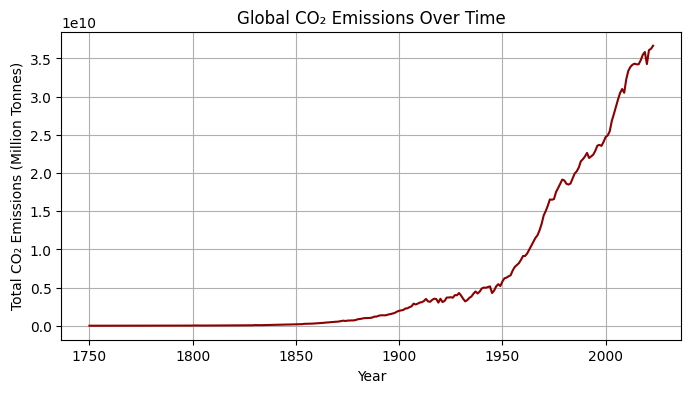

In [11]:
# Global CO₂ Emissions Over Time

co2_by_year = df_country_stats_cleaned.groupby('year')['total_co2_tonnes'].sum().reset_index()


plt.figure(figsize=(8, 4))
sns.lineplot(data=co2_by_year, x='year', y='total_co2_tonnes', color='darkred')
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO₂ Emissions (Million Tonnes)')
plt.grid(True)
plt.show()


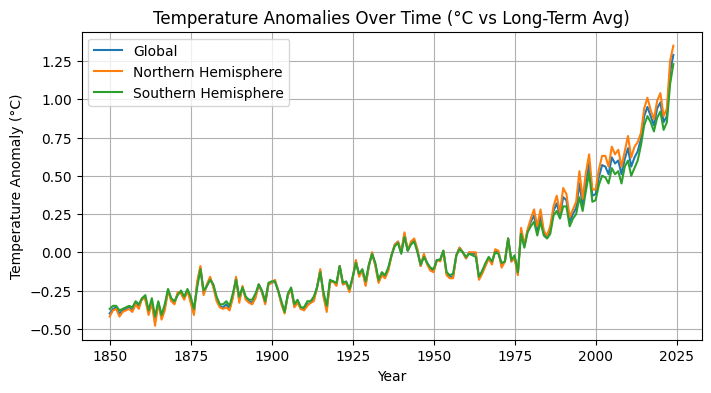

In [12]:
# Plotting temperature anomalies over time

plt.figure(figsize=(8, 4))

sns.lineplot(data=df_global_temp, x='year', y='global_temp_anomaly_c_vs_avg', label='Global')
sns.lineplot(data=df_global_temp, x='year', y='northern_hemisphere_temp_anomaly_c_vs_avg', label='Northern Hemisphere')
sns.lineplot(data=df_global_temp, x='year', y='southern_hemisphere_temp_anomaly_c_vs_avg', label='Southern Hemisphere')

plt.title('Temperature Anomalies Over Time (°C vs Long-Term Avg)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()



In [13]:
# Top Emitter of Each Pollutant (Latest Year)

latest_year = df_country_stats_cleaned['year'].max()
print(f"Latest Year in Data:,{latest_year}")

latest_data = df_country_stats_cleaned[df_country_stats_cleaned['year'] == latest_year]

pollutants = ['total_co2', 'total_ghg', 'total_methane', 'total_nitrous_oxide']

for pollutant in pollutants:
    print(f"\n Top {pollutant.upper()} Emitter in {latest_year}")
    print(latest_data[['country', pollutant]].sort_values(by=pollutant, ascending =False).head(1))

Latest Year in Data:,2023

 Top TOTAL_CO2 Emitter in 2023
     country  total_co2
9885   China  11902.503

 Top TOTAL_GHG Emitter in 2023
     country  total_ghg
9885   China  13968.915

 Top TOTAL_METHANE Emitter in 2023
     country  total_methane
9885   China        1886.24

 Top TOTAL_NITROUS_OXIDE Emitter in 2023
     country  total_nitrous_oxide
9885   China              410.853


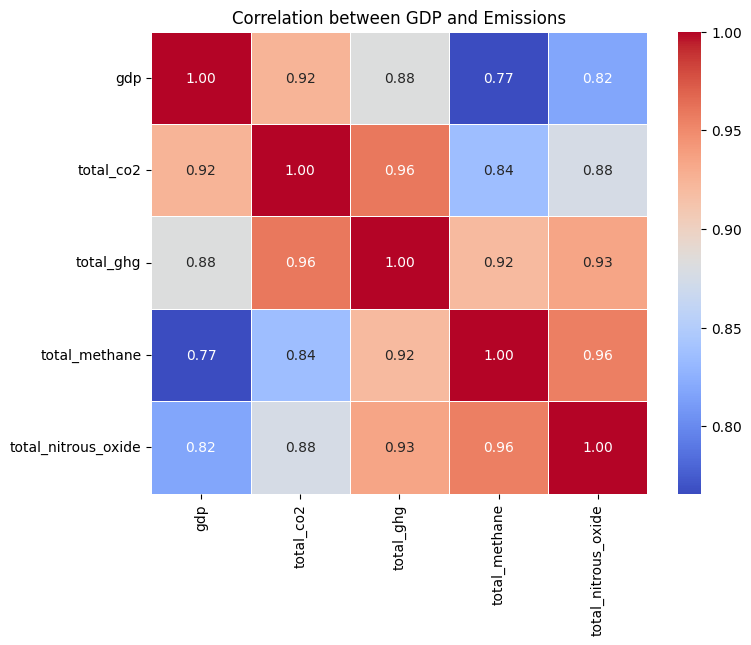

In [14]:
# Correlation Between GDP and Emissions (Heatmap)

corr_data = df_country_stats_cleaned[['gdp', 'total_co2', 'total_ghg', 'total_methane', 'total_nitrous_oxide']]

corr_data = corr_data.dropna()

corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between GDP and Emissions")
plt.show()


# Section 3: Saving Cleaned Files

In [18]:
%pip install xlsxwriter

In [19]:
# Saving all the data to a new excel file

output_path = 'Cleaned_Global_Environmental_Data.xlsx'

with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_country_stats_cleaned.to_excel(writer, sheet_name='Cleaned Country Stats', index=False)
    df_country_region.to_excel(writer, sheet_name='Country and Region', index=False)
    df_global_temp.to_excel(writer, sheet_name='Global Temperature Data', index=False)
    df_policy.to_excel(writer, sheet_name='Environmental Policies', index=False)

print(f"Data successfully saved to {output_path}")

Data successfully saved to Cleaned_Global_Environmental_Data.xlsx


In [20]:
from google.colab import files
files.download('Cleaned_Global_Environmental_Data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>